In [58]:

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()
plt.style.use('fivethirtyeight')

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

seed = 42

## Kaggle Fraud Detection
A typical organization loses an estimated 5% of its yearly revenue to fraud. Here we learn how to fight fraud by using data. For example, learn how to apply supervised learning algorithms to detect fraudulent behavior similar to past ones, as well as unsupervised learning methods to discover new types of fraud activities. Moreover, in fraud analytics often deal with highly imbalanced datasets when classifying fraud versus non-fraud, and in this notebook will pick up some techniques on how to deal with that.
Some of the references are:
- https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads
- https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7

In [59]:
#get the data from the competition website given above
datasets_path = "D:\\ml_code\\datasets\\"
file_name= "creditcard.csv"
card_df = pd.read_csv(datasets_path+file_name)

In [60]:
#main features are V1-V28, Amount is size of transaction and Class is fraud(0) or not fraud(1)
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [61]:
#llok for missing values
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [62]:
#get some stats
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [63]:
# Count the occurrences of fraud and no fraud and print them
occ = card_df['Class'].value_counts()
print("Fraud(1) to non-fraud(0) values")
display(occ)

# Print the ratio of fraud cases
occ = card_df['Class'].value_counts(normalize=True)
print("Fraud(1) to non-fraud(0) ratios normalized")
display(occ)

Fraud(1) to non-fraud(0) values


0    284315
1       492
Name: Class, dtype: int64

Fraud(1) to non-fraud(0) ratios normalized


0    0.998273
1    0.001727
Name: Class, dtype: float64

### Data Resampling

Clearly have an unbalanced dataset, lets try using a oversampling technique.

Apply Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations.

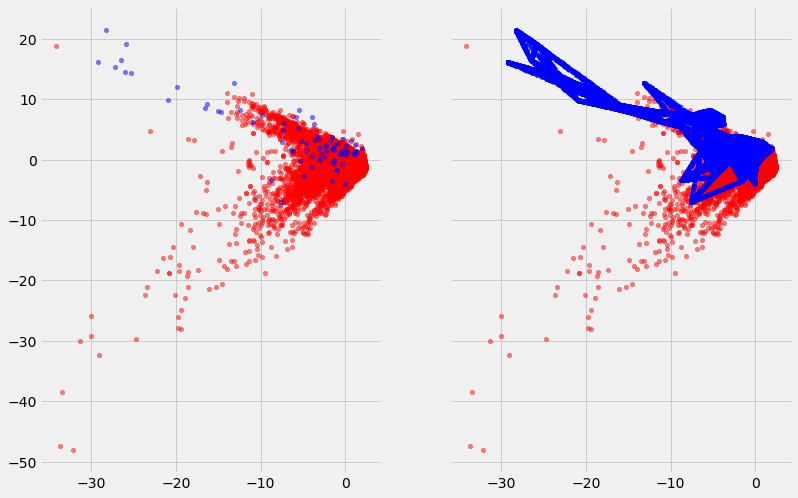

In [64]:
plt.rcParams['figure.figsize'] = [12, 8]
from imblearn.over_sampling import SMOTE

#lets generate a scatter plot to visualise the data and class imbalance - generate smaller dataframe for plotting
card_df_sub = card_df.sample(n=50000, random_state=seed)

#card_df_sub.columns

X = card_df_sub.iloc[:,1:29].values
y = card_df_sub.iloc[:,-1].values

# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

g1 =(X[y == 0, 0], X[y == 0, 1])
g2 = (X[y == 1, 0], X[y == 1, 1])
g3 =(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1])
g4 = (X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1])
data1 = (g1,g2)
data2 = (g3,g4)
colors = ("red","blue")
groups = ("red","blue")
f, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
f.set_label("rr")
for data,color,group in zip(data1,colors,groups):
    p1, p2 = data
    ax1.scatter(p1, p2, alpha=0.5,c=color, s=20,label=group)
for data, color,group in zip(data2, colors,groups):
    p1, p2 = data
    ax2.scatter(p1, p2, alpha=0.5, c=color, s=20,label=group)



&nbsp; **Example of imbalance in dataset before and after applying SMOTE **

### Exploring the traditional way to catch fraud
Define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. 

In [65]:
card_df_copy = card_df.copy()

# Get the mean for each group
card_df_copy.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
card_df_copy['flag_as_fraud'] = np.where(np.logical_and(card_df_copy.V1 < -3,card_df_copy.V3 < -5 ), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(card_df_copy.Class, card_df_copy.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


In [66]:
#try using sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(card_df_copy.Class, card_df_copy.flag_as_fraud)



array([[283089,   1226],
       [   322,    170]], dtype=int64)

Detect 170 out of 492 fraud cases but cannot detect the other 322 and get 1226 false positives

### Using ML classification to catch fraud

In [67]:
# Feature scaling
featuresToScale = card_df.drop(['Time','Class'],axis=1).columns
featuresToScale

#apply scaling to dataframe but exclude Time
sX = pp.StandardScaler(copy=True)
card_df.loc[:,featuresToScale] = sX.fit_transform(card_df[featuresToScale])

card_df.V1.std()

1.000001755579451

In [68]:
# Generate feature and labels as numpy array
X = card_df.loc[:,"Time":"Amount"].values
y = card_df.Class.values
#X.shape
#y.shape

In [69]:
#train test split ensure keep similar class distributions using stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed,stratify=y)

In [70]:
y_train.sum()/len(y_train)

0.0017293784718582959

In [71]:
y_test.sum()/len(y_test)

0.0017236426314277506

In [72]:
#generate function to print test results
def get_model_results(X_train, y_train, X_test, y_test, model,name):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print(name + " test results:")
    print()
    print("The classification report is:")
    print (classification_report(y_test, predicted))
    print("-"*60)
    print("The confusion matrix is:")
    print (confusion_matrix(y_test, predicted))
    print("-"*60)
    print("The roc auc score is {}".format(roc_auc_score(y_test, probs[:,1])))

### Baseline Logistic Regression

In [74]:
# Fit a logistic regression model to our data
model = LogisticRegression()
get_model_results(X_train, y_train, X_test, y_test, model,"Logistic Regression")

Logistic Regression test results:

The classification report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.77      0.67      0.71       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.88      0.83      0.86     93987
weighted avg       1.00      1.00      1.00     93987

------------------------------------------------------------
The confusion matrix is:
[[93792    33]
 [   54   108]]
------------------------------------------------------------
The roc auc score is 0.9232338244630633


Model predicts 141 cases of fraud out of which 108 are actual fraud

### Plotting the Precision Recall Curve
Plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught.

In [42]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post'),
    plt.fill_between(recall, precision, step='post', alpha=0.4, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

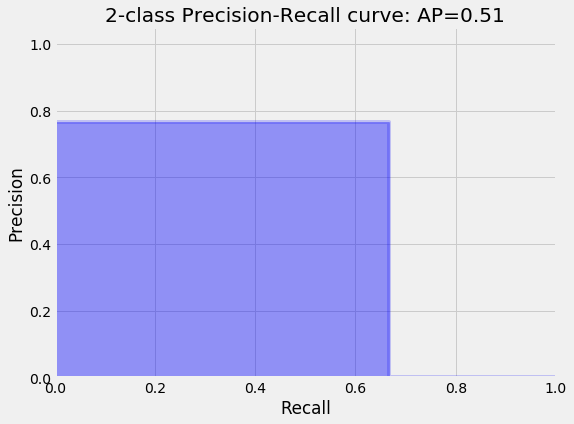

In [76]:
plt.rcParams['figure.figsize'] = [8, 6]

# Obtain the predictions from baseline model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Calculate average precision and the PR curve
#AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

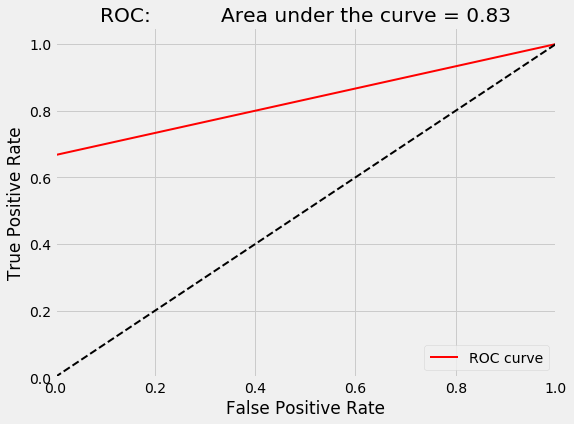

In [78]:
fpr, tpr, thresholds = roc_curve(y_test,predicted)

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

### Using SMOTE with Logistic Regression Model

In [44]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='regular')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

probs = model.predict_proba(X_test)
# Print the ROC curve, classification report and confusion matrix
print()
print("The roc auc score is {}".format(roc_auc_score(y_test, probs[:,1])))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     93825
           1       0.12      0.86      0.22       162

   micro avg       0.99      0.99      0.99     93987
   macro avg       0.56      0.92      0.60     93987
weighted avg       1.00      0.99      0.99     93987

Confusion matrix:
 [[92834   991]
 [   23   139]]

The roc auc score is 0.9411887115821745


Model with SMOTE produces much greater false positives but less false negatives so misses less cases of fraud

### Random Forest Classifier
Try improving on baseline with Random Forest Classifier

In [46]:
# Define the model with balanced subsample
model = RandomForestClassifier(random_state=seed)

get_model_results(X_train, y_train, X_test, y_test, model,"Random Forest")

Random Forest test results:

The classification report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.97      0.73      0.83       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.98      0.86      0.92     93987
weighted avg       1.00      1.00      1.00     93987

------------------------------------------------------------
The confusion matrix is:
[[93821     4]
 [   44   118]]
------------------------------------------------------------
The roc auc score is 0.9224943666466004


Model predicts 122 cases of fraud but misses 44, better results than Logistic Regression

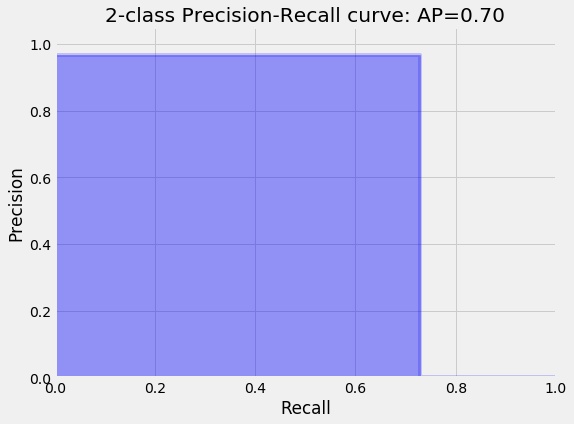

In [47]:
plt.rcParams['figure.figsize'] = [8, 6]

# Obtain the predictions from baseline model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Calculate average precision and the PR curve
#AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

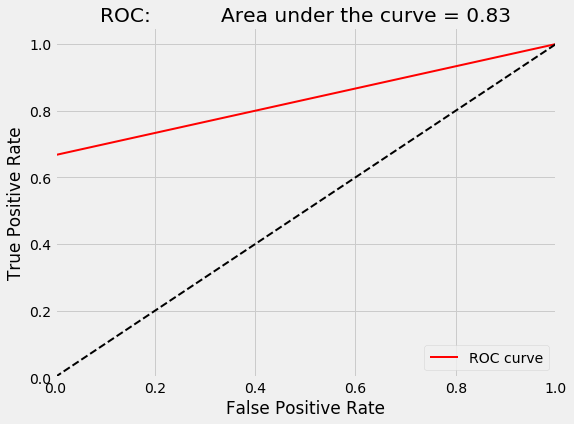

In [79]:
fpr, tpr, thresholds = roc_curve(y_test,predicted)

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()


### Adjusting the algorithm weights
A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn modell

In [48]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=seed)
get_model_results(X_train, y_train, X_test, y_test, model,"Random Forest Balanced Subsample")

Random Forest test results:

The classification report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.97      0.71      0.82       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.98      0.85      0.91     93987
weighted avg       1.00      1.00      1.00     93987

------------------------------------------------------------
The confusion matrix is:
[[93821     4]
 [   47   115]]
------------------------------------------------------------
The roc auc score is 0.9256676634001442


### Adjusting Random Forest to fraud detection
Define weights manually, to be able to off-set that imbalance slightly. 

In [54]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',

    # Change depth of model
    max_depth=10,

    # Change the number of samples in leaf nodes
    min_samples_leaf=10, 

    # Change the number of trees to use
    n_estimators=20, n_jobs=-1, random_state=seed)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model,"Random Forest Manual Weights")

Random Forest Manual Weights test results:

The classification report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.82      0.80      0.81       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.91      0.90      0.90     93987
weighted avg       1.00      1.00      1.00     93987

------------------------------------------------------------
The confusion matrix is:
[[93796    29]
 [   33   129]]
------------------------------------------------------------
The roc auc score is 0.953857194080127


Has increased recall score considerably

### GridSearchCV to find optimal parameters
Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize the model settings to get the best possible Recall score. If we also cared about reducing the number of false positives, we could optimize on F1-score, this gives that nice Precision-Recall trade-off.

In [55]:
# Define the parameter sets to test
param_grid = {'n_estimators': [5,20, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=seed)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print("The best model params are:")
CV_model.best_params_

The best model params are:


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 5}

In [56]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight={0:1,1:12},criterion='entropy',
            max_depth=8, max_features='auto',  min_samples_leaf=10, n_estimators=5, n_jobs=-1, random_state=seed)
get_model_results(X_train, y_train, X_test, y_test, model,"Random Forest CV")

Random Forest CV test results:

The classification report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.75      0.81      0.78       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.87      0.91      0.89     93987
weighted avg       1.00      1.00      1.00     93987

------------------------------------------------------------
The confusion matrix is:
[[93781    44]
 [   30   132]]
------------------------------------------------------------
The roc auc score is 0.9487719125111433
